In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

DIM = (176,176)

work_dr = IDG()

train_ds = train_datagen.flow_from_directory(
        "/kaggle/input/knee-oa-dataset/Dataset/Cropped/train",
        seed=123,
        target_size=(176, 176),
        batch_size=64,
        class_mode='sparse'
        )

test_ds = test_datagen.flow_from_directory(
"/kaggle/input/knee-oa-dataset/Dataset/Cropped/test",
seed=123,
target_size=(176, 176),
batch_size=64,
    class_mode='sparse'
)

val_ds = val_datagen.flow_from_directory(
"/kaggle/input/knee-oa-dataset/Dataset/Cropped/val",
seed=123,
target_size=(176, 176),
batch_size=64,
class_mode='sparse'
)

Found 5778 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.
Found 826 images belonging to 5 classes.


In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=10, 
                               restore_best_weights=True)

In [11]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return tf.cast(lr * tf.math.exp(-0.1), tf.float32)

lr_schedule = LearningRateScheduler(lr_scheduler)

## ResNet152

In [12]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

resnet152 = ResNet152(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
resnet152.trainable = True
resnet152_model_new = models.Sequential()
resnet152_model_new.add(resnet152)
resnet152_model_new.add(layers.GlobalAveragePooling2D())
resnet152_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
resnet152_model_new.add(layers.Dropout(0.3))
resnet152_model_new.add(layers.Dense(5, activation='softmax')) 

In [13]:
resnet152_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [14]:
resnet152_new = resnet152_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 161s 631ms/step - loss: 2.9518 - accuracy: 0.3821 - val_loss: 2.1822 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 54s 589ms/step - loss: 1.7059 - accuracy: 0.4463 - val_loss: 1.6335 - val_accuracy: 0.3935 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 55s 598ms/step - loss: 1.3470 - accuracy: 0.4846 - val_loss: 1.6931 - val_accuracy: 0.1283 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 55s 600ms/step - loss: 1.2293 - accuracy: 0.5026 - val_loss: 6.5262 - val_accuracy: 0.1283 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 54s 588ms/step - loss: 1.1565 - accuracy: 0.5194 - val_loss: 2.0109 - val_accuracy: 0.1283 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 54s 582ms/step - loss: 1.1356 - accuracy: 0.5331 - val_loss: 1.5896 - val_accuracy: 0.2567 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 54s 592ms/s

In [15]:
loss, accuracy = resnet152_model_new.evaluate(test_ds)

26/26 [==============================] - 11s 421ms/step - loss: 0.8117 - accuracy: 0.6673


## ResNet101

In [16]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
resnet101.trainable = True
resnet101_model_new = models.Sequential()
resnet101_model_new.add(resnet101)
resnet101_model_new.add(layers.GlobalAveragePooling2D())
resnet101_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
resnet101_model_new.add(layers.Dropout(0.3))
resnet101_model_new.add(layers.Dense(5, activation='softmax')) 

171446536/171446536 [==============================] - 8s 0us/step


In [17]:
resnet101_model_new.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [18]:
resnet101_new = resnet101_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 124s 602ms/step - loss: 3.7868 - accuracy: 0.4323 - val_loss: 4.2490 - val_accuracy: 0.1283 - lr: 1.0000e-04
Epoch 2/50
91/91 [==============================] - 53s 580ms/step - loss: 3.3285 - accuracy: 0.5327 - val_loss: 4.4610 - val_accuracy: 0.3971 - lr: 1.0000e-04
Epoch 3/50
91/91 [==============================] - 53s 582ms/step - loss: 2.9820 - accuracy: 0.5768 - val_loss: 3.3767 - val_accuracy: 0.3971 - lr: 1.0000e-04
Epoch 4/50
91/91 [==============================] - 52s 571ms/step - loss: 2.7342 - accuracy: 0.5867 - val_loss: 3.1056 - val_accuracy: 0.3184 - lr: 1.0000e-04
Epoch 5/50
91/91 [==============================] - 54s 587ms/step - loss: 2.4706 - accuracy: 0.6134 - val_loss: 3.0072 - val_accuracy: 0.2554 - lr: 1.0000e-04
Epoch 6/50
91/91 [==============================] - 53s 574ms/step - loss: 2.2633 - accuracy: 0.6142 - val_loss: 2.8000 - val_accuracy: 0.2409 - lr: 1.0000e-04
Epoch 7/50
91/91 [=====================

In [19]:
loss, accuracy = resnet101_model_new.evaluate(test_ds)

26/26 [==============================] - 5s 197ms/step - loss: 1.2937 - accuracy: 0.6479


## ResNet50

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
resnet50.trainable = True
resnet50_model_new = models.Sequential()
resnet50_model_new.add(resnet50)
resnet50_model_new.add(layers.GlobalAveragePooling2D())
resnet50_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
resnet50_model_new.add(layers.Dropout(0.3))
resnet50_model_new.add(layers.Dense(5, activation='softmax')) 

94765736/94765736 [==============================] - 5s 0us/step


In [21]:
resnet50_model_new.compile(optimizer=optimizers.Adam(learning_rate=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [22]:
resnet50_new = resnet50_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 87s 576ms/step - loss: 3.8265 - accuracy: 0.4181 - val_loss: 5.0098 - val_accuracy: 0.1283 - lr: 1.0000e-04
Epoch 2/50
91/91 [==============================] - 50s 551ms/step - loss: 3.3523 - accuracy: 0.5260 - val_loss: 3.6926 - val_accuracy: 0.1283 - lr: 1.0000e-04
Epoch 3/50
91/91 [==============================] - 51s 563ms/step - loss: 3.0200 - accuracy: 0.5684 - val_loss: 3.5039 - val_accuracy: 0.1465 - lr: 1.0000e-04
Epoch 4/50
91/91 [==============================] - 53s 584ms/step - loss: 2.7442 - accuracy: 0.5933 - val_loss: 4.2916 - val_accuracy: 0.2567 - lr: 1.0000e-04
Epoch 5/50
91/91 [==============================] - 52s 568ms/step - loss: 2.5079 - accuracy: 0.6057 - val_loss: 3.4597 - val_accuracy: 0.1913 - lr: 1.0000e-04
Epoch 6/50
91/91 [==============================] - 51s 562ms/step - loss: 2.2964 - accuracy: 0.6218 - val_loss: 3.0006 - val_accuracy: 0.2058 - lr: 1.0000e-04
Epoch 7/50
91/91 [======================

In [23]:
loss, accuracy = resnet50_model_new.evaluate(test_ds)

26/26 [==============================] - 5s 202ms/step - loss: 1.2568 - accuracy: 0.6461


## DenseNet121

In [24]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

denseNet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
denseNet121.trainable = True
denseNet121_model_new = models.Sequential()
denseNet121_model_new.add(denseNet121)
denseNet121_model_new.add(layers.GlobalAveragePooling2D())
denseNet121_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
denseNet121_model_new.add(layers.Dropout(0.3))
denseNet121_model_new.add(layers.Dense(5, activation='softmax')) 

29084464/29084464 [==============================] - 2s 0us/step


In [25]:
denseNet121_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [26]:
denseNet121_new = denseNet121_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 123s 631ms/step - loss: 2.6958 - accuracy: 0.4472 - val_loss: 3.1572 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 52s 572ms/step - loss: 1.6585 - accuracy: 0.5355 - val_loss: 2.2193 - val_accuracy: 0.4564 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 52s 572ms/step - loss: 1.3350 - accuracy: 0.5609 - val_loss: 1.5854 - val_accuracy: 0.4818 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 53s 575ms/step - loss: 1.1766 - accuracy: 0.5746 - val_loss: 1.3407 - val_accuracy: 0.5303 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 52s 567ms/step - loss: 1.0844 - accuracy: 0.5883 - val_loss: 1.4207 - val_accuracy: 0.4552 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 52s 571ms/step - loss: 1.0135 - accuracy: 0.6052 - val_loss: 1.0452 - val_accuracy: 0.5872 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 53s 581ms/s

In [27]:
loss, accuracy = denseNet121_model_new.evaluate(test_ds)

26/26 [==============================] - 7s 257ms/step - loss: 0.8128 - accuracy: 0.6528


## MobileNetV2

In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

mobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
mobileNetV2.trainable = True
mobileNetV2_model_new = models.Sequential()
mobileNetV2_model_new.add(mobileNetV2)
mobileNetV2_model_new.add(layers.GlobalAveragePooling2D())
mobileNetV2_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
mobileNetV2_model_new.add(layers.Dropout(0.3))
mobileNetV2_model_new.add(layers.Dense(5, activation='softmax')) 

9406464/9406464 [==============================] - 1s 0us/step


In [29]:
mobileNetV2_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [30]:
mobileNetV2_new = mobileNetV2_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 78s 551ms/step - loss: 2.8027 - accuracy: 0.4576 - val_loss: 7.2866 - val_accuracy: 0.3959 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 51s 564ms/step - loss: 1.4630 - accuracy: 0.5318 - val_loss: 3.4572 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 50s 548ms/step - loss: 1.1194 - accuracy: 0.5843 - val_loss: 4.0946 - val_accuracy: 0.4056 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 51s 555ms/step - loss: 1.0150 - accuracy: 0.5990 - val_loss: 2.8258 - val_accuracy: 0.4225 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 49s 540ms/step - loss: 0.9649 - accuracy: 0.6094 - val_loss: 4.1048 - val_accuracy: 0.3983 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 50s 551ms/step - loss: 0.9508 - accuracy: 0.6144 - val_loss: 3.5960 - val_accuracy: 0.4286 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 50s 553ms/st

In [31]:
loss, accuracy = mobileNetV2_model_new.evaluate(test_ds)

26/26 [==============================] - 4s 157ms/step - loss: 1.9228 - accuracy: 0.5018


### InceptionV3

In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.regularizers import l2

inceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(176, 176, 3))
inceptionV3.trainable = True
inceptionV3_model_new = models.Sequential()
inceptionV3_model_new.add(inceptionV3)
inceptionV3_model_new.add(layers.GlobalAveragePooling2D())
inceptionV3_model_new.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
inceptionV3_model_new.add(layers.Dropout(0.3))
inceptionV3_model_new.add(layers.Dense(5, activation='softmax')) 

87910968/87910968 [==============================] - 4s 0us/step


In [33]:
inceptionV3_model_new.compile(optimizer=optimizers.Adam(lr=0.0001), 
                           loss='sparse_categorical_crossentropy', 
                           metrics=['accuracy'])

In [34]:
inceptionV3_new = inceptionV3_model_new.fit(train_ds, epochs=50, validation_data=val_ds,
                       batch_size=64, callbacks = [early_stopping, lr_schedule])

Epoch 1/50
91/91 [==============================] - 88s 577ms/step - loss: 2.6528 - accuracy: 0.4216 - val_loss: 2.9732 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 2/50
91/91 [==============================] - 51s 556ms/step - loss: 1.3679 - accuracy: 0.5087 - val_loss: 4.4245 - val_accuracy: 0.2167 - lr: 0.0010
Epoch 3/50
91/91 [==============================] - 52s 569ms/step - loss: 1.1541 - accuracy: 0.5382 - val_loss: 1.0965 - val_accuracy: 0.5666 - lr: 0.0010
Epoch 4/50
91/91 [==============================] - 53s 579ms/step - loss: 1.0855 - accuracy: 0.5519 - val_loss: 2.0192 - val_accuracy: 0.5182 - lr: 0.0010
Epoch 5/50
91/91 [==============================] - 52s 565ms/step - loss: 1.0847 - accuracy: 0.5592 - val_loss: 3.0884 - val_accuracy: 0.4988 - lr: 0.0010
Epoch 6/50
91/91 [==============================] - 50s 549ms/step - loss: 1.0226 - accuracy: 0.5779 - val_loss: 1.2157 - val_accuracy: 0.5557 - lr: 0.0010
Epoch 7/50
91/91 [==============================] - 51s 561ms/st

In [35]:
loss, accuracy = inceptionV3_model_new.evaluate(test_ds)

26/26 [==============================] - 5s 194ms/step - loss: 0.7897 - accuracy: 0.6715


### Plots

In [37]:
test_ds = test_datagen.flow_from_directory(
"/kaggle/input/knee-oa-dataset/Dataset/Cropped/test",
seed=123,
target_size=(176, 176),
batch_size=64,
    class_mode='sparse',
    shuffle = False
)

Found 1656 images belonging to 5 classes.


In [38]:
test_labels = test_ds.classes

In [39]:
predictions = inceptionV3_model_new.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

26/26 [==============================] - 5s 147ms/step


In [40]:
predicted_classes = predicted_classes.astype(np.int32)
predicted_classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

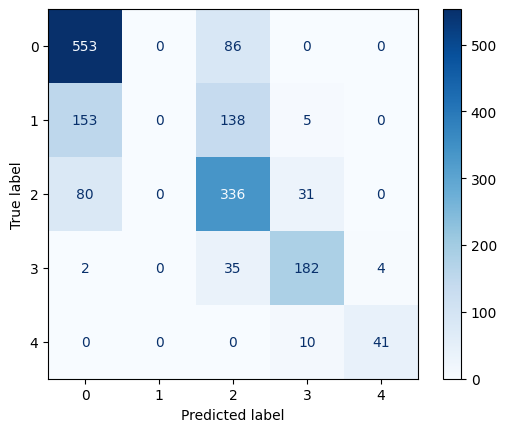

In [42]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(test_labels, predicted_classes)
dispCM = sklearn.metrics.ConfusionMatrixDisplay(confMatrix, display_labels=test_ds.class_indices.keys())
dispCM.plot(cmap='Blues', values_format='d')

In [43]:
print(sklearn.metrics.classification_report(test_labels, predicted_classes, target_names=test_ds.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       639
           1       0.00      0.00      0.00       296
           2       0.56      0.75      0.64       447
           3       0.80      0.82      0.81       223
           4       0.91      0.80      0.85        51

    accuracy                           0.67      1656
   macro avg       0.60      0.65      0.62      1656
weighted avg       0.56      0.67      0.61      1656



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


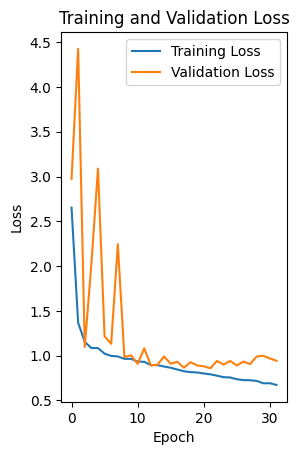

In [44]:
plt.subplot(1, 2, 1)
plt.plot(inceptionV3_new.history['loss'], label='Training Loss')
plt.plot(inceptionV3_new.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.xlim(-10,50)
plt.legend()

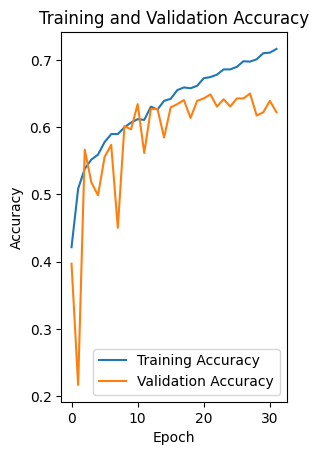

In [45]:
plt.subplot(1, 2, 2)
plt.plot(inceptionV3_new.history['accuracy'], label='Training Accuracy')
plt.plot(inceptionV3_new.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

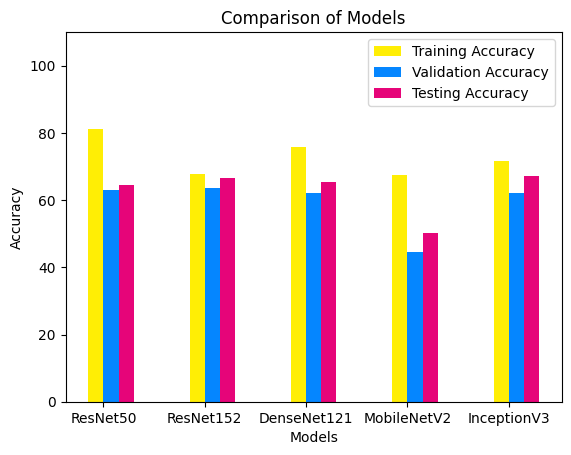

In [49]:
import matplotlib.pyplot as plt

models = ['ResNet50', 'ResNet152', 'DenseNet121', 'MobileNetV2', 'InceptionV3']

training = [81.27, 67.72, 75.74, 67.55, 71.65]
validation = [63.08, 63.56, 62.23, 44.67, 62.23]
testing = [64.61, 66.73, 65.28, 50.18, 67.15]

bar_width = 0.15

index = np.arange(len(models))

plt.bar(index, training, width=bar_width, label='Training Accuracy', color=(1,0.933,0.02))
plt.bar(index + bar_width, validation, width=bar_width, label='Validation Accuracy', color=(0.02,0.525,1))
plt.bar(index + bar_width*2, testing, width=bar_width, label='Testing Accuracy', color=(0.9,0.02,0.475))


plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.xticks(index + bar_width / 2, models)
plt.legend(loc='upper right')
plt.ylim(0, 110)

plt.show()